<a href="https://colab.research.google.com/github/HoaiNam52/KT_AI_HOAINAM_19146219/blob/main/KT_AI_HoaiNam_19146219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/FOOD/trainingdata',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/FOOD/trainingdata',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/FOOD/testingdata',
                                               target_size=(100,100),
                                               batch_size=128,
                                               class_mode ='categorical')

Found 72 images belonging to 4 classes.
Found 8 images belonging to 4 classes.
Found 0 images belonging to 0 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(training_set,batch_size=128,epochs=20,verbose=1,validation_data=validation_set)

Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 1.5699 - accuracy: 0.2639 - val_loss: 19.2926 - val_accuracy: 0.3750
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 22.9656 - accuracy: 0.2639 - val_loss: 17.1375 - val_accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 16.6742 - accuracy: 0.2500 - val_loss: 1.5192 - val_accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 2.0551 - accuracy: 0.3611 - val_loss: 3.8282 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 4.1362 - accuracy: 0.3611 - val_loss: 3.7726 - val_accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 3.8099 - accuracy: 0.2778 - val_loss: 1.7623 - val_accuracy: 0.6250
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 1.7718 - accuracy: 0.5139 - val_loss: 1.3782 - val_accuracy: 0.5000
Epoch 8/20
1/1 [=====================

In [19]:
model.save("BANH_CNN.h5")

In [7]:
training_set.class_indices

{'BANHDALON': 0, 'BANHHOI': 1, 'BANHUOT': 2, 'BANHXEO': 3}

In [15]:
label = ['BANHDALON', 'BANHUOT', 'BANHHOI', 'BANHXEO']

BANHXEO


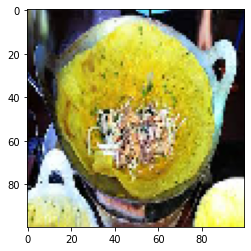

In [20]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('banhxeo.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])